<a href="https://colab.research.google.com/github/sjamillah/Chronic_Disease_Management_System/blob/main/Summative_Intro_to_ml_%5BSSOZI_Jamillah%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo



In [158]:
!pip install tensorflow


# Case Study and Implementation




In [204]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [160]:
data = pd.read_csv('/content/sample_data/cardio_train.csv', delimiter=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [161]:
relevant_features = ['age', 'height', 'weight', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
data_filtered = data[relevant_features + ['cardio']]
data_filtered.head()

,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,cardio
0,18393,168,62.0,2,110,80,1,1,0
1,20228,156,85.0,1,140,90,3,1,1
2,18857,165,64.0,1,130,70,3,1,1
3,17623,169,82.0,2,150,100,1,1,1
4,17474,156,56.0,1,100,60,1,1,0


In [162]:
np.random.seed(42)

cultural_belief_categories = ['Never', 'Occasionally', 'Frequently']
data_filtered.loc[:, 'cultural_belief_score'] = np.random.choice(cultural_belief_categories, len(data_filtered))

treatment_adherence = ['Low', 'Medium', 'High']
data_filtered.loc[:, 'treatment_adherence'] = np.random.choice(treatment_adherence, len(data_filtered))

distance_categories = ['Near', 'Moderate', 'Far']
data_filtered.loc[:, 'distance_to_healthcare'] = np.random.choice(distance_categories, len(data_filtered))

<ipython-input-162-89697823e833>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'cultural_belief_score'] = np.random.choice(cultural_belief_categories, len(data_filtered))
<ipython-input-162-89697823e833>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'treatment_adherence'] = np.random.choice(treatment_adherence, len(data_filtered))
<ipython-input-162-89697823e833>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [163]:
data_filtered.describe()

,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,1.349571,128.817286,96.630414,1.366871,1.226457,0.499700
std,2467.251667,8.210126,14.395757,0.476838,154.011419,188.472530,0.680250,0.572270,0.500003
min,10798.000000,55.000000,10.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000
25%,17664.000000,159.000000,65.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000
50%,19703.000000,165.000000,72.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000
75%,21327.000000,170.000000,82.000000,2.000000,140.000000,90.000000,2.000000,1.000000,1.000000
max,23713.000000,250.000000,200.000000,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000


In [164]:
synthetic_notes = [
    "Patient shows high BP, high cholesterol, obesity-related risks. Echocardiogram suggests early-stage RHD.",
    "Mild hypertension noted. Controlled glucose levels. Moderate adherence to medication.",
    "History of tobacco use. Symptoms indicate potential COPD overlap. Needs lifestyle intervention.",
    "Shortness of breath and fatigue reported. Distance to care facility may impact treatment adherence."
]
data_filtered['clinical_notes'] = np.random.choice(synthetic_notes, len(data_filtered))

In [165]:
data_filtered.loc[:, 'risk_level'] = np.select(
    [
        (data_filtered['ap_hi'] <= 140) & (data_filtered['cholesterol'] <= 1) & (data_filtered['gluc'] <= 1),
        ((data_filtered['ap_hi'] > 140) & (data_filtered['ap_hi'] <= 160)) | (data_filtered['cholesterol'] == 2) | (data_filtered['gluc'] == 2),
        (data_filtered['ap_hi'] > 160) | (data_filtered['cholesterol'] > 2) | (data_filtered['gluc'] > 2)
    ],
    [0, 1, 2],
    default=1
)

In [166]:
data_filtered.drop('cardio', axis=1, inplace=True)

In [167]:
relevant_features = [
    'age', 'height', 'weight', 'gender', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'cultural_belief_score',
    'treatment_adherence', 'distance_to_healthcare'
]
data_filtered = data_filtered[relevant_features + ['risk_level']]
data_filtered.head()

,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,cultural_belief_score,treatment_adherence,distance_to_healthcare,risk_level
0,18393,168,62.0,2,110,80,1,1,Frequently,Low,Moderate,0
1,20228,156,85.0,1,140,90,3,1,Never,Medium,Far,2
2,18857,165,64.0,1,130,70,3,1,Frequently,High,Near,2
3,17623,169,82.0,2,150,100,1,1,Frequently,High,Moderate,1
4,17474,156,56.0,1,100,60,1,1,Never,Low,Far,0


In [168]:
data_processed = pd.get_dummies(data_filtered, drop_first=True)

In [169]:
X = data_processed.drop('risk_level', axis=1)
Y = data_processed['risk_level']

In [170]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((49000, 14), (16800, 14), (4200, 14), (49000,), (16800,), (4200,))

In [171]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [172]:
num_classes = len(set(Y_train))
print("Number of classes:", num_classes)

Number of classes: 3


In [173]:
print("NaN in X_train:", np.isnan(data_processed).sum().sum())
print("Inf in X_train:", np.isinf(data_processed).sum().sum())

NaN in X_train: 0
Inf in X_train: 0


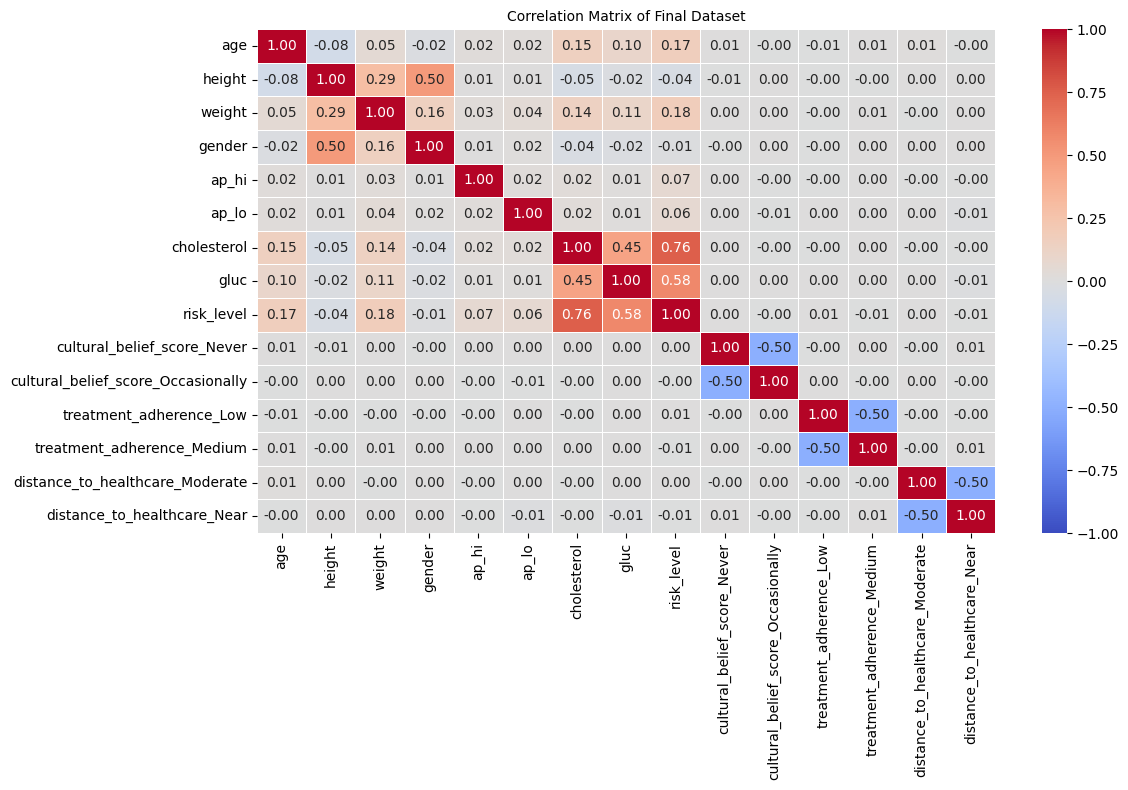

In [227]:
correlation_matrix = data_processed.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Final Dataset', fontsize=10)
plt.tight_layout()
plt.show()

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [245]:
def cardio_model(
    model_type: str,
    X_train,
    Y_train,
    X_val,
    Y_val,
    optimization: str = "adam",
    regularization_type: str = None,
    reg_value: int = 0.1,
    early_stopping: bool = False,
    patience: int = 5,
    dropout: float = 0.0,
    epochs: int = 10,
    batch_size: int = 32,
    learning_rate: float = 0.002):

  model = Sequential()

  if regularization_type == "l1":
    regularizer = l1(reg_value)
  elif regularization_type == "l2":
    regularizer = l2(reg_value)
  else:
    regularizer = None

  if model_type == "model1":
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1], )))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

  else:
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1], ), kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    if dropout > 0:
      model.add(Dropout(dropout))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    if dropout > 0:
      model.add(Dropout(dropout))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    if dropout > 0:
      model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    if dropout > 0:
      model.add(Dropout(dropout))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(num_classes, activation='softmax'))

  optimizers = {
      "adam": Adam(learning_rate=learning_rate),
      "sgd": SGD(learning_rate=learning_rate),
      "rmsprop": RMSprop(learning_rate=learning_rate)
  }

  optimizer = optimizers.get(optimization, Adam(learning_rate=learning_rate))

  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  callbacks = []
  if early_stopping:
    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1)
    callbacks.append(early_stopping_callback)

  history = model.fit(
      X_train, Y_train,
      epochs=epochs,
      batch_size=batch_size,
      validation_data=(X_val, Y_val),
      callbacks=callbacks)

  return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [246]:
def loss_curve_plot(history, model_name="Model"):
    """Plots training and validation loss for a given model history."""

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.title(f'{model_name} - Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True, which='both', axis='both', linestyle='--', color='gray', alpha=0.5)
    plt.tight_layout()
    plt.show()


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [247]:
# Model 1
model1, history_model1 = cardio_model(
    model_type="model1",
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    optimization="adam",
    early_stopping=False,
    regularization_type=None,
    reg_value=0.0,
    dropout=0.0,
    epochs=20,
    batch_size=32,
    learning_rate=0.0)

train_loss_model1, val_loss_model1 = history_model1.history['loss'][-1], history_model1.history['val_loss'][-1]
train_acc_model1, val_acc_model1 = history_model1.history['accuracy'][-1], history_model1.history['val_accuracy'][-1]

print(f"Model 1 - Train Loss: {train_loss_model1:.4f}, Validation Loss: {val_loss_model1:.4f}")
print(f"Model 1 - Train Accuracy: {train_acc_model1:.4f}, Validation Accuracy: {val_acc_model1:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2345 - loss: 1.2111 - val_accuracy: 0.2320 - val_loss: 1.2134
Epoch 2/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2356 - loss: 1.2140 - val_accuracy: 0.2320 - val_loss: 1.2134
Epoch 3/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2355 - loss: 1.2117 - val_accuracy: 0.2320 - val_loss: 1.2134
Epoch 4/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2326 - loss: 1.2127 - val_accuracy: 0.2320 - val_loss: 1.2134
Epoch 5/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2334 - loss: 1.2130 - val_accuracy: 0.2320 - val_loss: 1.2134
Epoch 6/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.2326 - loss: 1.2126 - val_accuracy: 0.2320 - val_loss: 1.2134
Epoch 7/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2331 - loss: 1.2128 - val_accuracy: 0.2320 - val_loss: 1.2134
Epoch 8/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2322 - loss: 1.2141 - val_acc

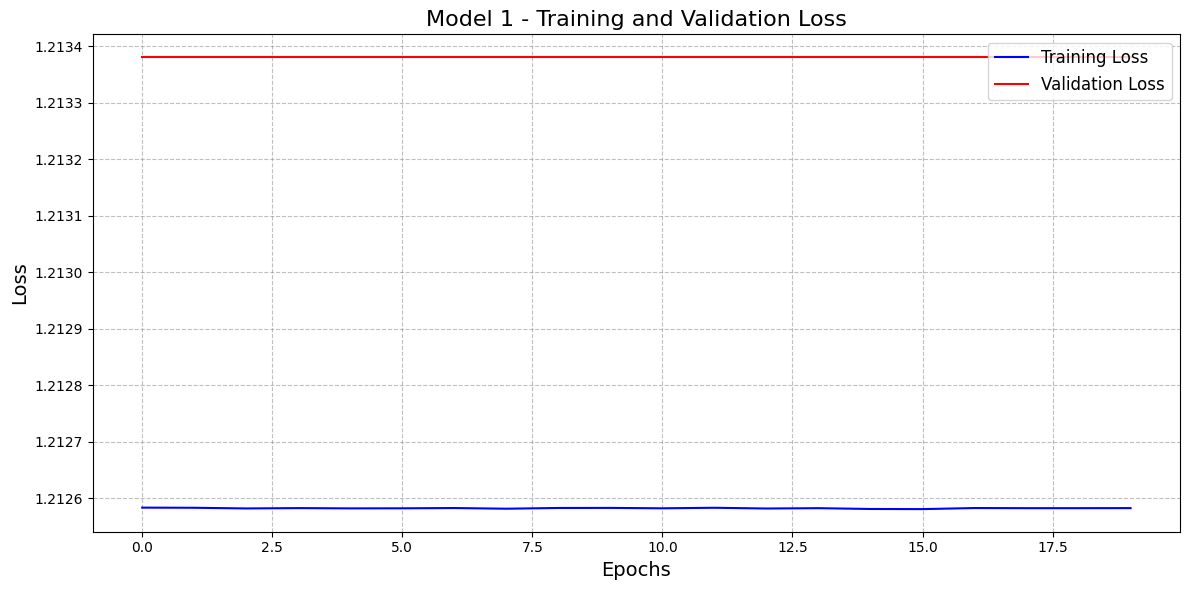

In [248]:
loss_curve_plot(history_model1, model_name="Model 1")

In [252]:
model1.save('model1.keras')

In [198]:
# Model 2
model2, history_model2 = cardio_model(
    model_type="model2",
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    optimization="adam",
    early_stopping=True,
    patience=20,
    regularization_type='l2',
    reg_value=0.2,
    dropout=0.5,
    epochs=150,
    batch_size=32,
    learning_rate=0.001)

train_loss_model2, val_loss_model2 = history_model2.history['loss'][-1], history_model2.history['val_loss'][-1]
train_acc_model2, val_acc_model2 = history_model2.history['accuracy'][-1], history_model2.history['val_accuracy'][-1]

print(f"Model 2 - Train Loss: {train_loss_model2:.4f}, Validation Loss: {val_loss_model2:.4f}")
print(f"Model 2 - Train Accuracy: {train_acc_model2:.4f}, Validation Accuracy: {val_acc_model2:.4f}")

Epoch 1/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7058 - loss: 12.6725 - val_accuracy: 0.8286 - val_loss: 0.5451
Epoch 2/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.8208 - loss: 0.5576 - val_accuracy: 0.8474 - val_loss: 0.4801
Epoch 3/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8254 - loss: 0.5044 - val_accuracy: 0.8414 - val_loss: 0.4252
Epoch 4/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8307 - loss: 0.4876 - val_accuracy: 0.8419 - val_loss: 0.4123
Epoch 5/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8376 - loss: 0.4832 - val_accuracy: 0.8926 - val_loss: 0.4164
Epoch 6/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8384 - loss: 0.4846 - val_accuracy: 0.8924 - val_loss: 0.4035
Epoch 7/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8432 - loss: 0.4827 - val_accuracy: 0.8509 - val_loss: 0.4443
Epoch 8/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8470

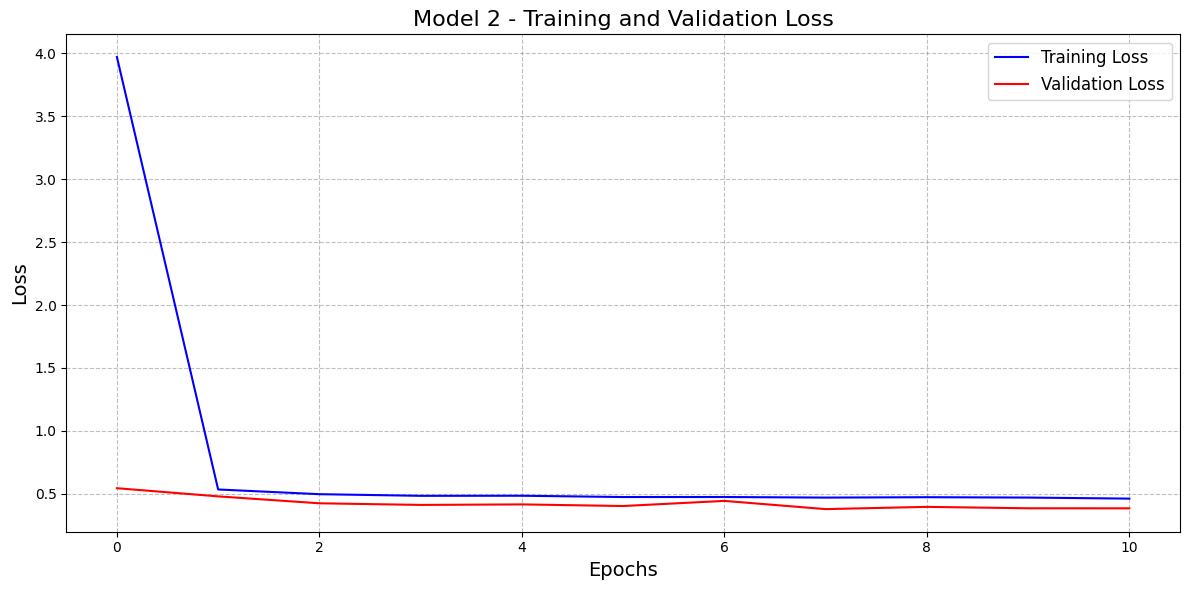

In [230]:
loss_curve_plot(history_model2, model_name="Model 2")

In [200]:
model2.save('model2.keras')

In [193]:
# Model 3
model3, history_model3 = cardio_model(
    model_type="model3",
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    optimization="sgd",
    early_stopping=True,
    patience=20,
    regularization_type='l2',
    reg_value=0.1,
    dropout=0.4,
    epochs=500,
    batch_size=32,
    learning_rate=0.006)

train_loss_model3, val_loss_model3 = history_model3.history['loss'][-1], history_model3.history['val_loss'][-1]
train_acc_model3, val_acc_model3 = history_model3.history['accuracy'][-1], history_model3.history['val_accuracy'][-1]

print(f"Model 3 - Train Loss: {train_loss_model3:.4f}, Validation Loss: {val_loss_model3:.4f}")
print(f"Model 3 - Train Accuracy: {train_acc_model3:.4f}, Validation Accuracy: {val_acc_model3:.4f}")

Epoch 1/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.5886 - loss: 19.3059 - val_accuracy: 0.8127 - val_loss: 1.5261
Epoch 2/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8491 - loss: 1.0480 - val_accuracy: 0.7475 - val_loss: 0.7803
Epoch 3/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8695 - loss: 0.5431 - val_accuracy: 0.9108 - val_loss: 0.4454
Epoch 4/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8756 - loss: 0.5026 - val_accuracy: 0.9154 - val_loss: 0.4356
Epoch 5/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8776 - loss: 0.4978 - val_accuracy: 0.9123 - val_loss: 0.4368
Epoch 6/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8801 - loss: 0.4853 - val_accuracy: 0.9094 - val_loss: 0.4468
Epoch 7/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8854 - loss: 0.4742 - val_accuracy: 0.9111 - val_loss: 0.4220
Epoch 8/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8868 

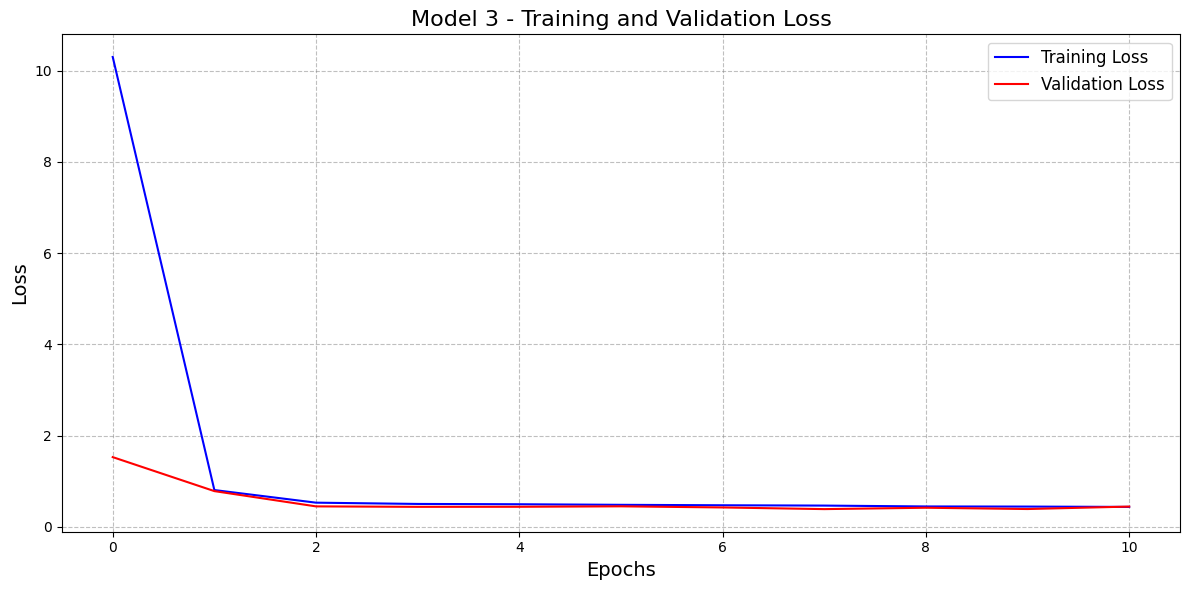

In [231]:
loss_curve_plot(history_model3, model_name="Model 3")

In [196]:
model3.save('model3.keras')

In [249]:
# Model 4
model4, history_model4 = cardio_model(
    model_type="model4",
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    optimization="rmsprop",
    early_stopping=True,
    patience=20,
    regularization_type='l2',
    reg_value=0.02,
    dropout=0.1,
    epochs=200,
    batch_size=32,
    learning_rate=0.001)

train_loss_model4, val_loss_model4 = history_model4.history['loss'][-1], history_model4.history['val_loss'][-1]
train_acc_model4, val_acc_model4 = history_model4.history['accuracy'][-1], history_model4.history['val_accuracy'][-1]

print(f"Model 4 - Train Loss: {train_loss_model4:.4f}, Validation Loss: {val_loss_model4:.4f}")
print(f"Model 4 - Train Accuracy: {train_acc_model4:.4f}, Validation Accuracy: {val_acc_model4:.4f}")

Epoch 1/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8203 - loss: 2.5942 - val_accuracy: 0.9349 - val_loss: 0.2757
Epoch 2/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9226 - loss: 0.2869 - val_accuracy: 0.9349 - val_loss: 0.2181
Epoch 3/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9319 - loss: 0.2336 - val_accuracy: 0.9514 - val_loss: 0.1811
Epoch 4/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9425 - loss: 0.2102 - val_accuracy: 0.9610 - val_loss: 0.1775
Epoch 5/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9484 - loss: 0.1916 - val_accuracy: 0.9658 - val_loss: 0.1482
Epoch 6/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9515 - loss: 0.1805 - val_accuracy: 0.9760 - val_loss: 0.1223
Epoch 7/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9542 - loss: 0.1693 - val_accuracy: 0.9690 - val_loss: 0.1313
Epoch 8/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9562 -

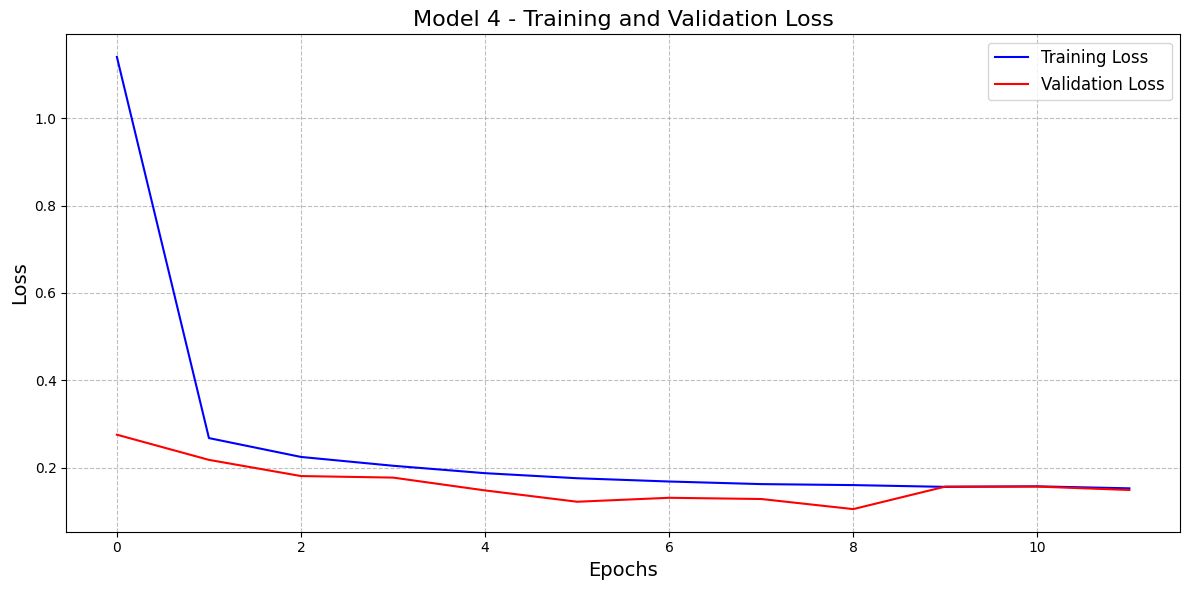

In [250]:
loss_curve_plot(history_model4, model_name="Model 4")

In [251]:
model4.save('model4.keras')

# XGBoost Model

In [243]:
def cardio_model_xgb(
    X_train, Y_train, X_val, Y_val,
    learning_rate=0.1, n_estimators=70, max_depth=3,
    early_stopping=True, early_stopping_rounds=10,
    hyperparameter_tuning=True, num_classes=3
):

    if hyperparameter_tuning:
        param_grid = {
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [70, 140, 210],
            'max_depth': [3, 5, 7]
        }
        xgb_model = xgb.XGBClassifier(
            objective='multi:softmax', num_class=num_classes,
            eval_metric="mlogloss", use_label_encoder=False
        )
        grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, Y_train)
        print(f"Best Parameters: {grid_search.best_params_}")

        best_params = grid_search.best_params_
        learning_rate = best_params['learning_rate']
        n_estimators = best_params['n_estimators']
        max_depth = best_params['max_depth']

    model = xgb.XGBClassifier(
        learning_rate=learning_rate, n_estimators=n_estimators,
        max_depth=max_depth, objective='multi:softmax',
        num_class=num_classes, eval_metric="mlogloss",
        use_label_encoder=False
    )

    eval_set = [(X_val, Y_val)]
    if early_stopping:
        model.fit(X_train, Y_train, eval_set=eval_set, verbose=True)
        if hasattr(model, 'best_iteration'):
            model.n_estimators = model.best_iteration
    else:
        model.fit(X_train, Y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    train_acc = accuracy_score(Y_train, train_preds)
    val_acc = accuracy_score(Y_val, val_preds)

    print(f"XGBoost Model - Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

    feature_importances = model.feature_importances_
    feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

    plt.figure(figsize=(12, 6))
    plt.barh(feature_names, feature_importances, align='center', color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance from XGBoost Model')
    plt.tight_layout()
    plt.show()

    return model


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:17:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 70}
[0]	validation_0-mlogloss:1.08368
[1]	validation_0-mlogloss:1.06903
[2]	validation_0-mlogloss:1.05465
[3]	validation_0-mlogloss:1.04053
[4]	validation_0-mlogloss:1.02667
[5]	validation_0-mlogloss:1.01305
[6]	validation_0-mlogloss:0.99968
[7]	validation_0-mlogloss:0.98654


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:17:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-mlogloss:0.97362
[9]	validation_0-mlogloss:0.96093
[10]	validation_0-mlogloss:0.94846
[11]	validation_0-mlogloss:0.93620
[12]	validation_0-mlogloss:0.92414
[13]	validation_0-mlogloss:0.91228
[14]	validation_0-mlogloss:0.90062
[15]	validation_0-mlogloss:0.88915
[16]	validation_0-mlogloss:0.87787
[17]	validation_0-mlogloss:0.86677
[18]	validation_0-mlogloss:0.85585
[19]	validation_0-mlogloss:0.84510
[20]	validation_0-mlogloss:0.83453
[21]	validation_0-mlogloss:0.82412
[22]	validation_0-mlogloss:0.81387
[23]	validation_0-mlogloss:0.80378
[24]	validation_0-mlogloss:0.79385
[25]	validation_0-mlogloss:0.78407
[26]	validation_0-mlogloss:0.77443
[27]	validation_0-mlogloss:0.76495
[28]	validation_0-mlogloss:0.75561
[29]	validation_0-mlogloss:0.74640
[30]	validation_0-mlogloss:0.73734
[31]	validation_0-mlogloss:0.72840
[32]	validation_0-mlogloss:0.71960
[33]	validation_0-mlogloss:0.71093
[34]	validation_0-mlogloss:0.70239
[35]	validation_0-mlogloss:0.69397
[36]	validation_0-mlog

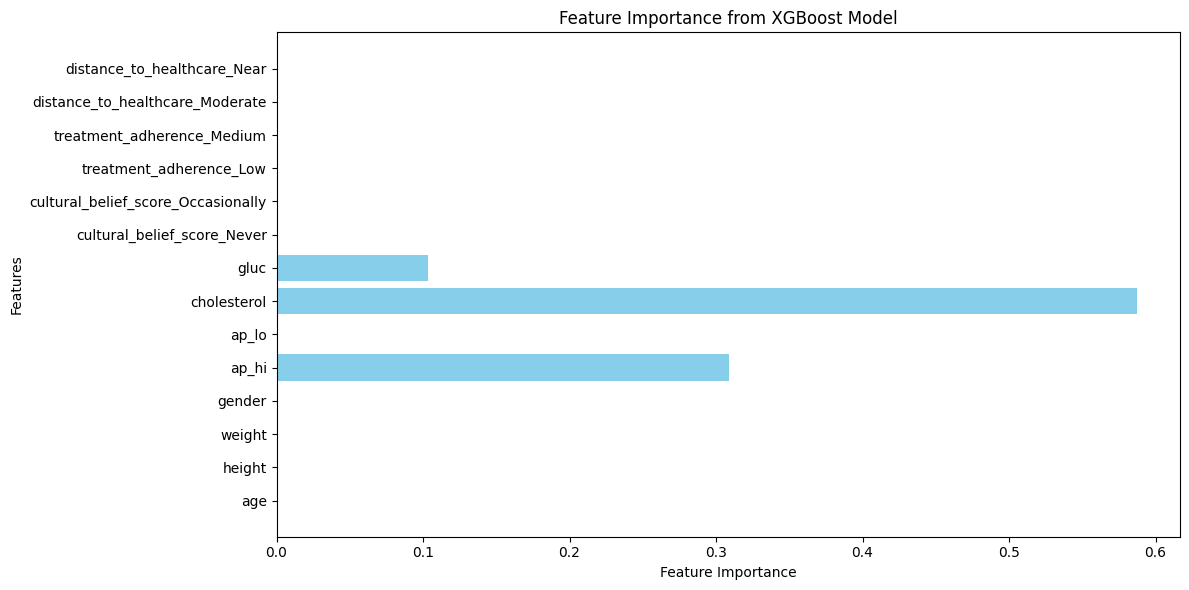

In [244]:
model_xgb = cardio_model_xgb(
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    hyperparameter_tuning=True,
    num_classes=num_classes
)

In [256]:
model_xgb.save_model('xgb_model.json')

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [253]:
import seaborn as sns

def evaluate_model(model_path, X_test, Y_test, model_name="model"):
    model = load_model(model_path)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    conf_matrix = confusion_matrix(Y_test, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print(f'{model_name} Classification Report:\n')
    print(classification_report(Y_test, y_pred_classes))

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


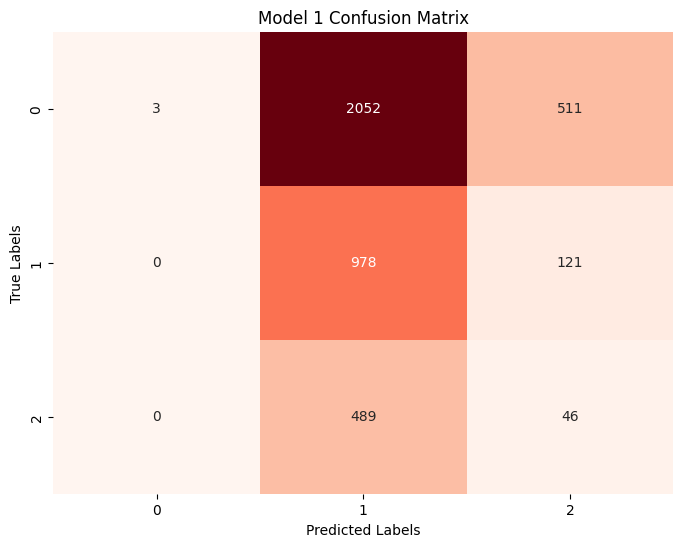

Model 1 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2566
           1       0.28      0.89      0.42      1099
           2       0.07      0.09      0.08       535

    accuracy                           0.24      4200
   macro avg       0.45      0.33      0.17      4200
weighted avg       0.69      0.24      0.12      4200



In [254]:
evaluate_model("model1.keras", X_test, Y_test, "Model 1")

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


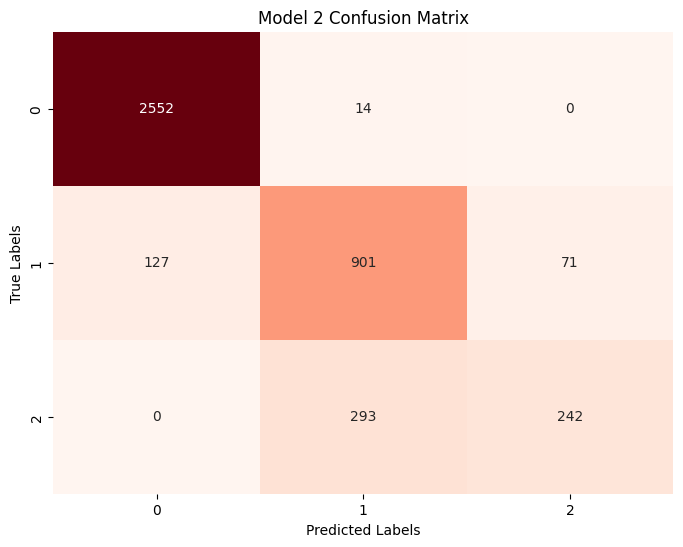

Model 2 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2566
           1       0.75      0.82      0.78      1099
           2       0.77      0.45      0.57       535

    accuracy                           0.88      4200
   macro avg       0.82      0.76      0.77      4200
weighted avg       0.88      0.88      0.87      4200



In [212]:
evaluate_model("model2.keras", X_test, Y_test, "Model 2")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


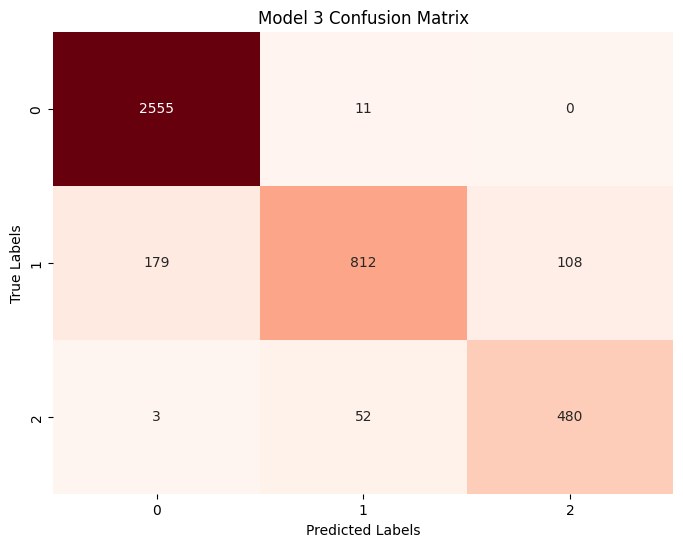

Model 3 Classification Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2566
           1       0.93      0.74      0.82      1099
           2       0.82      0.90      0.85       535

    accuracy                           0.92      4200
   macro avg       0.89      0.88      0.88      4200
weighted avg       0.92      0.92      0.91      4200



In [213]:
evaluate_model("model3.keras", X_test, Y_test, "Model 3")

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


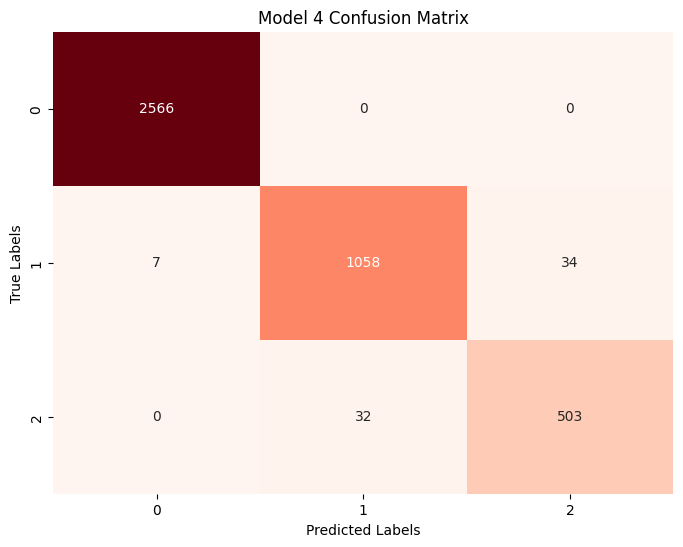

Model 4 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2566
           1       0.97      0.96      0.97      1099
           2       0.94      0.94      0.94       535

    accuracy                           0.98      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.98      0.98      0.98      4200



In [255]:
evaluate_model("model4.keras", X_test, Y_test, "Model 4")

In [220]:
def make_predictions(model_path, X):
    model = load_model(model_path)

    predictions = model.predict(X)

    predicted_classes = np.argmax(predictions, axis=1)

    return predicted_classes

In [223]:
model_path = '/content/model4.keras'
make_predictions(model_path, X_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2, 1, 1, ..., 0, 1, 0])

Congratulations!!
